# Chapter 4: Hyperspace!

Paolo Perrotta, Programming Machine Learning: From Coding to Deep Learning (2020)

## Upgrading the Learner

### Preparing Data

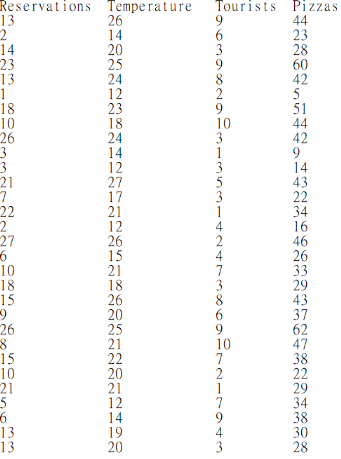

In [83]:
import numpy as np
x1, x2, x3, y = np.loadtxt("pizza_3_vars.txt", skiprows=1, unpack=True)

In [84]:
print(x1[0:5], x2[0:5], x3[0:5], y[0:5])

[13.  2. 14. 23. 13.] [26. 14. 20. 25. 24.] [9. 6. 3. 9. 8.] [44. 23. 28. 60. 42.]


In [85]:
x1.shape

(30,)

In [86]:
x1[2]

14.0

In [87]:
X = np.column_stack((x1, x2, x3))
X.shape

(30, 3)

In [88]:
X[4,:3]

array([13., 24.,  8.])

In [89]:
X[:3] # 第0列到第二列

array([[13., 26.,  9.],
       [ 2., 14.,  6.],
       [14., 20.,  3.]])

In [90]:
X[3:] # 第三列以後全部

array([[23., 25.,  9.],
       [13., 24.,  8.],
       [ 1., 12.,  2.],
       [18., 23.,  9.],
       [10., 18., 10.],
       [26., 24.,  3.],
       [ 3., 14.,  1.],
       [ 3., 12.,  3.],
       [21., 27.,  5.],
       [ 7., 17.,  3.],
       [22., 21.,  1.],
       [ 2., 12.,  4.],
       [27., 26.,  2.],
       [ 6., 15.,  4.],
       [10., 21.,  7.],
       [18., 18.,  3.],
       [15., 26.,  8.],
       [ 9., 20.,  6.],
       [26., 25.,  9.],
       [ 8., 21., 10.],
       [15., 22.,  7.],
       [10., 20.,  2.],
       [21., 21.,  1.],
       [ 5., 12.,  7.],
       [ 6., 14.,  9.],
       [13., 19.,  4.],
       [13., 20.,  3.]])

In [91]:
Y = y.reshape(-1, 1)
Y.shape

(30, 1)

### Upgrading Prediction

In [92]:
def predict(X, w):
    return np.matmul(X, w)

In [93]:
w = np.zeros((X.shape[1], 1))
w.shape

(3, 1)

In [94]:
y_hat = np.matmul(X, w)
y_hat.shape

(30, 1)

### Upgrading the Loss

In [95]:
def loss(X, Y, w):
    return np.average((predict(X, w) - Y) ** 2)

In [96]:
print((predict(X, w) - Y).shape)

(30, 1)


In [97]:
a_number = loss(X, Y, w)
a_number.shape

()

### Upgrading the Gradient

In [98]:
def gradient(X, Y, w):
    return 2 * np.matmul(X.T, (predict(X, w) - Y)) / X.shape[0]

### Putting It All Together

In [99]:
def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        print("Iteration %4d => Loss: %.20f" % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w


w = train(X, Y, iterations=100, lr=0.001)

Iteration    0 => Loss: 1333.56666666666660603369
Iteration    1 => Loss: 151.14311361881479456315
Iteration    2 => Loss: 64.99460808656145616169
Iteration    3 => Loss: 57.26915626621605781565
Iteration    4 => Loss: 55.23298174669454851937
Iteration    5 => Loss: 53.68246847367679919216
Iteration    6 => Loss: 52.23968654565974389925
Iteration    7 => Loss: 50.87204908750363330228
Iteration    8 => Loss: 49.57213794415822860628
Iteration    9 => Loss: 48.33478160934136269589
Iteration   10 => Loss: 47.15537628166509875882
Iteration   11 => Loss: 46.02972857236275672221
Iteration   12 => Loss: 44.95401039440473311970
Iteration   13 => Loss: 43.92472500406262980732
Iteration   14 => Loss: 42.93867668505424006753
Iteration   15 => Loss: 41.99294327447717734003
Iteration   16 => Loss: 41.08485123365450419897
Iteration   17 => Loss: 40.21195302528302306655
Iteration   18 => Loss: 39.37200658263542862869
Iteration   19 => Loss: 38.56295667662588755320
Iteration   20 => Loss: 37.7829180045

In [80]:
w

array([[0.71777461],
       [1.04741709],
       [0.35378208]])

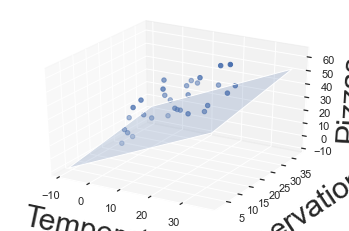

In [81]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Plot a plane that roughly approximates a dataset with two input variables.
# Plot the axes
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
ax = plt.figure().gca(projection="3d")
ax.set_xlabel("Temperature", labelpad=15, fontsize=30)
ax.set_ylabel("Reservations", labelpad=15, fontsize=30)
ax.set_zlabel("Pizzas", labelpad=5, fontsize=30)

# Plot the data points
ax.scatter(x1, x2, y, color='b')

# Plot the plane
MARGIN = 10
edges_x = [np.min(x1) - MARGIN, np.max(x1) + MARGIN]
edges_y = [np.min(x2) - MARGIN, np.max(x2) + MARGIN]
xs, ys = np.meshgrid(edges_x, edges_y)
zs = np.array([w[0] + x * w[1] + y * w[2] for x, y in
              zip(np.ravel(xs), np.ravel(ys))])
ax.plot_surface(xs, ys, zs.reshape((2, 2)), alpha=0.2)

plt.show()


## Bye Bye, Bias

y = w1*x1 + w2*x2 + w3*x3 + b = b * 1 + w1*x1 + w2*x2 + w3*x3  where we consider b as w0 and 1 as x0

In [102]:
x1, x2, x3, y = np.loadtxt("pizza_3_vars.txt", skiprows=1, unpack=True)
X = np.column_stack((np.ones(x1.size), x1, x2, x3))
Y = y.reshape(-1, 1)
w = train(X, Y, iterations=300, lr=0.001)

print("\nWeights: %s" % w.T)
print("\nA few predictions:")
for i in range(5):
    print("X[%d] -> %.4f (label: %d)" % (i, predict(X[i], w), Y[i]))

Iteration    0 => Loss: 1333.56666666666660603369
Iteration    1 => Loss: 152.37148173674074769224
Iteration    2 => Loss: 65.17252143398701491606
Iteration    3 => Loss: 57.29348107043314541897
Iteration    4 => Loss: 55.24408375010615657175
Iteration    5 => Loss: 53.69548034496938981874
Iteration    6 => Loss: 52.25567333361470900854
Iteration    7 => Loss: 50.89073275996360479212
Iteration    8 => Loss: 49.59315053477826751305
Iteration    9 => Loss: 48.35777747932070269599
Iteration   10 => Loss: 47.18003972981339444459
Iteration   11 => Loss: 46.05577241746296834890
Iteration   12 => Loss: 44.98117392026740901656
Iteration   13 => Loss: 43.95277197431995119814
Iteration   14 => Loss: 42.96739348065430874613
Iteration   15 => Loss: 42.02213715248832670568
Iteration   16 => Loss: 41.11434870159364152187
Iteration   17 => Loss: 40.24159832491246646669
Iteration   18 => Loss: 39.40166027726749575777
Iteration   19 => Loss: 38.59249433612598778609
Iteration   20 => Loss: 37.8122289824